In [2]:
%load_ext autoreload
%autoreload 2
from functools import partial

import keras


import scipy

import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np

import matplotlib.pyplot as plt
import resource
import datetime
import time

2024-05-20 13:23:19.584549: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-20 13:23:19.652374: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-20 13:23:19.652424: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-20 13:23:19.653902: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-20 13:23:19.665574: I tensorflow/core/platform/cpu_feature_guar

In [3]:
num_locations_S=4
# model these 4 locations with mixture of 4 components
num_components_C=num_locations_S
scale = 1
means = [5.0, 15.0, 25.0, 35.0]

# simulate data for each location
data_distributions = [scipy.stats.norm(loc=mean, scale=scale) for mean in means]

num_examples_T = 1000
y_TS = np.array([dist.rvs(num_examples_T) for dist in data_distributions]).T

# x doesn't matter because we aren't actually learning
num_features_F = 20
x_TF = np.random.randn(num_examples_T, num_features_F)


2024-05-20 13:23:36.908630: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-05-20 13:23:36.908703: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:129] retrieving CUDA diagnostic information for host: s1cmp008.pax.tufts.edu
2024-05-20 13:23:36.908712: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:136] hostname: s1cmp008.pax.tufts.edu
2024-05-20 13:23:36.908889: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:159] libcuda reported version is: 535.129.3
2024-05-20 13:23:36.908945: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:163] kernel reported version is: 535.129.3
2024-05-20 13:23:36.908954: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:241] kernel version seems to match DSO: 535.129.3


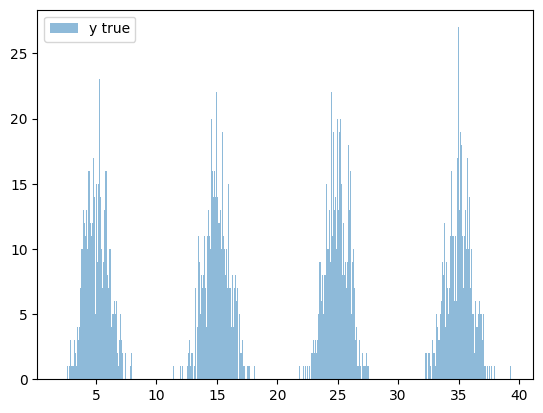

In [4]:
plt.hist(tf.reshape(y_TS, [-1]).numpy(),alpha=0.5, bins=1000, label='y true')
plt.legend()

In [11]:
mixture_weights = tf.expand_dims(tf.eye(4), axis = 0)
pred_means_example_1 = tf.expand_dims([4.9, 15.1, 24.9, 35.1],axis=0)
pred_means_example_2 = tf.expand_dims([5.1, 14.9, 25.1, 34.9],axis=0)
pred_means = tf.concat([pred_means_example_1, pred_means_example_2], axis=0)

In [12]:
mixture_dist = tfp.distributions.MixtureSameFamily(mixture_distribution=
                                                tfp.distributions.Categorical(probs=mixture_weights),
                                            components_distribution=
                                                tfp.distributions.Normal(loc=pred_means,
                                                                        scale=1.0))

In [13]:
mixture_dist.sample(10)

ValueError: Incompatible shapes for broadcasting. Two shapes are compatible if for each dimension pair they are either equal or one of them is 1. Received: (2,) and (1, 4).